In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [148]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#BA4D49','#4D6168','#F06560','#83A8AE','#E6B0A4','#C9CFAD']),
    'axes.spines.left'   : True,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.labelcolor'  :'#4D6168',
    'axes.grid'           : True,
    'axes.axisbelow'      : True,
    
    'font.sans-serif': 'Arial Rounded MT Bold',
    'font.family': 'sans-serif',
    
    'text.color': '#4D6168',
    
    'xtick.color' : '#4D6168',
    'ytick.color' : '#4D6168',
    
    'grid.color':  '#83A8AE',
    
    'legend.edgecolor': 'white',
 
})

In [97]:
df = pd.ExcelFile("NationalOutbreakPublicDataTool.xlsx").parse()

# The data's from here: https://wwwn.cdc.gov/norsdashboard/

In [98]:
df.head(100)

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify
0,2009,1,Minnesota,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,NaN,16,0.0,8.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,1,Minnesota,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,5.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,21.0,0.0,21.0,cookies,NaN,Multiple,NaN,NaN,NaN,NaN
5,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,7,0.0,7.0,0.0,7.0,"salad, unspecified",NaN,Multiple,NaN,NaN,NaN,NaN
6,2009,2,Minnesota,Food,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,5,0.0,5.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009,2,Minnesota,Food,Norovirus Genogroup II,NaN,Suspected,Restaurant - other or unknown type,22,1.0,1.0,0.0,22.0,mushrooms; pasta salad; fruit,NaN,Multiple,NaN,NaN,NaN,NaN
8,2009,2,Minnesota,Food,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,16,0.0,16.0,0.0,16.0,vegetables,NaN,Multiple,NaN,NaN,NaN,NaN
9,2009,2,Minnesota,Food,Campylobacter jejuni,NaN,Confirmed,Restaurant - other or unknown type,11,2.0,11.0,0.0,11.0,"lettuce, unspecified",NaN,Vegetable Row Crops,NaN,NaN,NaN,NaN


In [123]:
#get rid of Multiple sources, which I don't want to include to my graph as I want to include only single source deaths
df = df[df['IFSAC Category'] != 'Multiple']
df = df[df['IFSAC Category'] != 'Unclassifiable']
df = df[df['IFSAC Category'] != 'Other']

In [124]:
#Finding out about foodborne outbreaks that resulted in deaths
df_deaths = df[df['Deaths']>0]
df_deaths.Deaths.sum()

274.0

In [125]:
df_deaths.head(100)

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify
300,2009,7,Michigan,Food,Salmonella enterica,Newport,Confirmed,NaN,4,2.0,4.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,2009,5,West Virginia,Food,Salmonella enterica,Enteritidis,Confirmed,NaN,21,9.0,21.0,2.0,21.0,"sausage, pork",NaN,Pork,NaN,NaN,NaN,NaN
792,2010,5,Louisiana,Food,Clostridium perfringens,NaN,Confirmed,NaN,54,3.0,54.0,3.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,2010,6,New York,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Other,3,1.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,2010,10,Colorado,Food,Norovirus unknown,NaN,Confirmed,Long-term care/nursing home/assisted living fa...,21,4.0,21.0,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,2011,3,Rhode Island,Food,Salmonella enterica,Heidelberg,Confirmed,NaN,81,29.0,81.0,2.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,2009,2,Multistate,Food,Salmonella enterica,Carrau,Confirmed,Grocery store,53,4.0,NaN,1.0,NaN,melon,NaN,Fruits,NaN,NaN,NaN,NaN
1487,2009,8,Multistate,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Other,32,19.0,NaN,2.0,NaN,"ground beef, other",NaN,Beef,NaN,NaN,NaN,NaN
1575,2010,1,Texas,Food,Listeria monocytogenes,NaN,Confirmed,NaN,10,10.0,10.0,5.0,10.0,"celery, unspecified",NaN,Vegetable Row Crops,NaN,NaN,NaN,NaN
1578,2009,10,Multistate,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Restaurant - Sit-down dining,25,9.0,24.0,1.0,25.0,needle tenderized steak,"steak, sirloin",Beef,NaN,NaN,NaN,NaN


In [126]:
#Combining Seeded Vegetables and Vegetable Row Crops to Vegetables
df_deaths['IFSAC Category'] = df_deaths['IFSAC Category'].str.replace('Seeded Vegetables','Vegetables')


/Users/palar/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [127]:
df_deaths['IFSAC Category'] = df_deaths['IFSAC Category'].str.replace('Vegetable Row Crops','Vegetables')


/Users/palar/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_deaths['IFSAC Category'] = df_deaths['IFSAC Category'].str.replace('Root/Underground','Root Vegetables')

/Users/palar/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
df_deaths['IFSAC Category'] = df_deaths['IFSAC Category'].str.replace('Nuts-Seeds','Nuts and Seeds')



/Users/palar/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_deaths

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify
300,2009,7,Michigan,Food,Salmonella enterica,Newport,Confirmed,NaN,4,2.0,4.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,2009,5,West Virginia,Food,Salmonella enterica,Enteritidis,Confirmed,NaN,21,9.0,21.0,2.0,21.0,"sausage, pork",NaN,Pork,NaN,NaN,NaN,NaN
792,2010,5,Louisiana,Food,Clostridium perfringens,NaN,Confirmed,NaN,54,3.0,54.0,3.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,2010,6,New York,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Other,3,1.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,2010,10,Colorado,Food,Norovirus unknown,NaN,Confirmed,Long-term care/nursing home/assisted living fa...,21,4.0,21.0,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,2011,3,Rhode Island,Food,Salmonella enterica,Heidelberg,Confirmed,NaN,81,29.0,81.0,2.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,2009,2,Multistate,Food,Salmonella enterica,Carrau,Confirmed,Grocery store,53,4.0,NaN,1.0,NaN,melon,NaN,Fruits,NaN,NaN,NaN,NaN
1487,2009,8,Multistate,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Other,32,19.0,NaN,2.0,NaN,"ground beef, other",NaN,Beef,NaN,NaN,NaN,NaN
1575,2010,1,Texas,Food,Listeria monocytogenes,NaN,Confirmed,NaN,10,10.0,10.0,5.0,10.0,"celery, unspecified",NaN,Vegetables,NaN,NaN,NaN,NaN
1578,2009,10,Multistate,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Restaurant - Sit-down dining,25,9.0,24.0,1.0,25.0,needle tenderized steak,"steak, sirloin",Beef,NaN,NaN,NaN,NaN


In [200]:
x = df_deaths.groupby('IFSAC Category').Deaths.sum()
df_grouped = x.to_frame(name='deaths')
df_grouped


,deaths
IFSAC Category,
Beef,15.0
Chicken,6.0
Dairy,24.0
Eggs,2.0
Fish,4.0
Fruits,55.0
Fungi,3.0
Game,1.0
Mollusks,5.0


In [207]:
df_grouped = df_grouped.sort_values('deaths', ascending=True)

Text(0.5,1,'Food that kills')

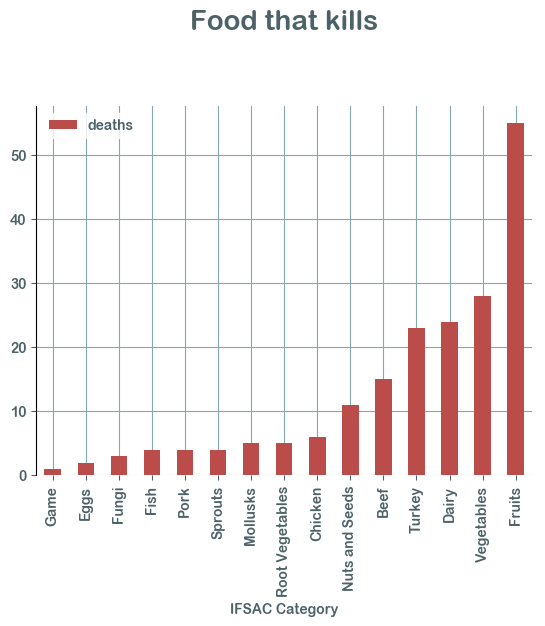

In [209]:
ax = df_grouped.plot(kind='bar')
ax.set_title("Food that kills", pad=55, fontsize=20, loc='center')



Text(0.55,0.95,'Deaths caused by foodborne outbreaks (where a single source is known)')

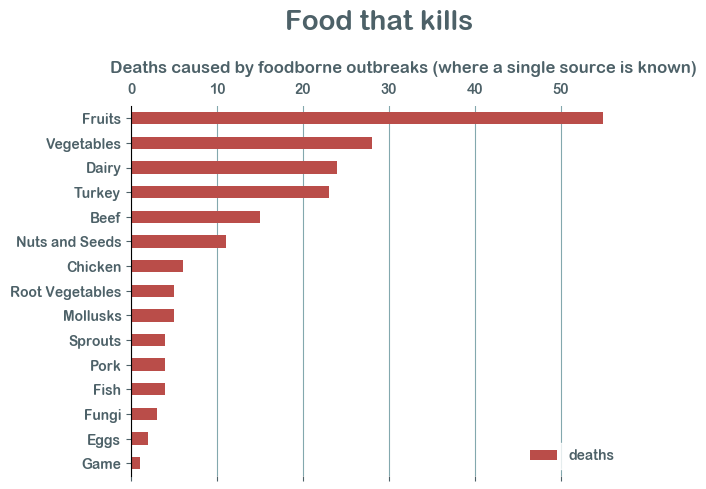

In [210]:
ax = df_grouped.plot(kind='barh')
ax.set_title("Food that kills", pad=55, fontsize=20, loc='center')

ax.yaxis.label.set_visible(False)
ax.grid(False, axis='y')
ax.tick_params(labeltop=True, labelbottom=False)
plt.gcf().text(0.55, 0.95, "Deaths caused by foodborne outbreaks (where a single source is known)", ha='center', fontsize=12)
